# Primer Examen 15%

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
#A- Cargar el archivo

json = pd.read_json('/content/gdrive/MyDrive/Colab Notebooks/Métodos computacionales/solutions (1).json')
json

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [5]:
#1) Adicione una columna nueva 'smax' con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna 'solution' 
json['smax'] = json['solution'].apply(lambda i: max(map(abs,i)))
json


,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


In [8]:
#2) Adicione dos columnas nuevas: 'sum_s' (sum_s³) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna 'solution' 

json['sum_s'] =  json['solution'].apply(lambda i : sum(i))
json['sum_s3'] =  json['solution'].apply(lambda i : sum(i))

json

,l,k,solution,gcd,n,smax,sum_s,sum_s3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


El numero aleatorio es:  205848
Las raices reales son:  [-1.42330486  1.          0.75779535]


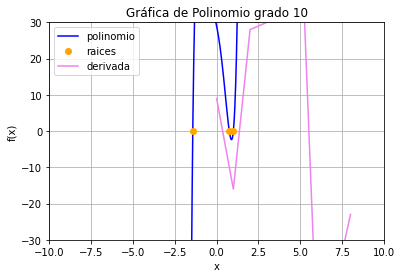

In [44]:
#3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073.
#Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes.
#Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: 
#el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje x y en el eje y del gráfico,
#de manera que el polinomio y sus raices se visualicen de la mejor forma posible. 
#(Sugerencia → use: plt.ylim(ymin,ymax) ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo
random.seed(1193054974)
num = random.randrange(390074)
print("El numero aleatorio es: ",num)
coeficiente= json.loc[num][2]
polinomio= np.poly1d(coeficiente)
r= np.roots(polinomio)
rreal = r[r.imag == 0].real
print("Las raices reales son: ", rreal)
num= np.linspace(-2,10,1000)
der= polinomio.deriv()


plt.figure()
plt.plot(num, polinomio(num), color= 'blue', label= "polinomio")
plt.plot(rreal, polinomio(rreal), 'o', color= 'orange', label= "raices")
plt.plot(der,color= 'violet',label='derivada')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Gráfica de Polinomio grado 10")
plt.legend()
plt.grid()
plt.ylim(-30,30)
plt.xlim(-10, 10)
plt.show()


B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [16]:
p= random.random()
p

0.11056798774233867

La función es la número:  3
El valor de P es:  0.11056798774233867
Las raices son:  [-5.61357366 -3.54426983  3.54426983  5.61357366]


(-1.0, 1.0)

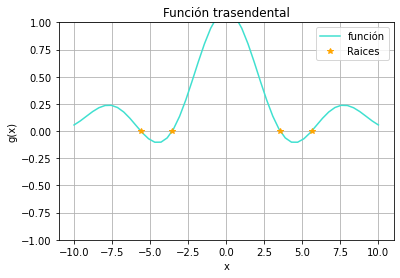

In [43]:
#I)Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5
#II)De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones

random.seed(1193054974)
n = random.randrange(6)
print("La función es la número: ", n)
# ((np.sin(x)/x) + p)
#III)Genere un número aleatorio entre 0 y 1 y asignelo al valor de  p

#p= random.random()
print("El valor de P es: ", p)

#IV)Encuentre la solución a la ecuación trascendental para el intervalo  x  entre -10 y 10 y 
#gráfique la correspondiente función trascendental y las correspondientes soluciones. .
# Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

g= lambda x : ((np.sin(x)/x) + p)
x= np.linspace(-10,10)

from scipy import optimize
ra = optimize.newton(g,[-6, -3, 3, 6])
print("Las raices son: ", ra)


plt.figure()
plt.plot(x, g(x), color= 'turquoise', label= "función")
plt.plot(ra, g(ra), '*', color= 'orange', label= "Raices")
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title("Función trasendental")
plt.legend()
plt.grid()
plt.ylim(-1,1)

